In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import sweetviz as sv
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
warnings.filterwarnings('ignore')

In [3]:
user_eng = pd.read_csv('takehome_user_engagement.csv')

In [4]:
user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [91]:
user_eng.count()

time_stamp         207917
user_id            207917
visited            207917
one_week_future    207917
dtype: int64

In [5]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [6]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
users.tail()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,NaN


In [8]:
user_eng.sort_values(by=['user_id', 'time_stamp'], ascending=True, inplace = True)

In [9]:
user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
user_eng['time_stamp'].dtype

dtype('O')

In [11]:
user_eng['time_stamp']= pd.to_datetime(user_eng['time_stamp'])

In [12]:
user_eng['time_stamp'].dtype

dtype('<M8[ns]')

In [13]:
plus_one = 1
user_eng['one_week_future'] =  user_eng.time_stamp + pd.DateOffset(weeks=plus_one)

In [145]:
x = len(user_eng)
adpt_user = []
adpt_user_time = []
for i in range (x-2):
    if (user_eng['user_id'][i] == user_eng['user_id'][i+1] and 
        user_eng['user_id'][i+1] == user_eng['user_id'][i+2] and 
        user_eng['time_stamp'][i+2] <= user_eng['one_week_future'][i] and
        user_eng['user_id'][i] not in adpt_user):
        adpt_user.append(user_eng['user_id'][i])
        adpt_user_time.append(user_eng['time_stamp'][i])
   

In [144]:
len(adpt_user)

1656

In [148]:
users = users[users['object_id'].isin(adpt_user)]

In [150]:
users.reset_index(drop = True, inplace = True)

In [152]:
user_eng = user_eng[user_eng['user_id'].isin(adpt_user)]

In [155]:
user_eng.reset_index(drop = True, inplace = True)

In [160]:
adpt_user_d = dict(zip(adpt_user, adpt_user_time))

In [178]:
len(set(user_eng['user_id']))

1656

In [179]:
len(adpt_user_d)

1656

In [204]:
cont_use = []
counter = 0
x = len(user_eng)
for i in range (x-1):
    if (user_eng['user_id'][i] == user_eng['user_id'][i+1] and
        user_eng['time_stamp'][i] >= adpt_user_d.get(user_eng['user_id'][i])):
        counter += 1
    if user_eng['user_id'][i] != user_eng['user_id'][i+1]:
        cont_use.append(counter)
        counter = 0
        

In [205]:
cont_use.append(30)

In [206]:
cont_use[-1]

30

In [207]:
users['cont_use'] = cont_use

In [208]:
users.head()

,object_id,creation_time,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,cont_use,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,0,0,1,1,7,1,0,1,0,0,0
1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1,1,318,1,281,1,0,1,0,0,0
2,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,0,0,58,0,6,1,0,0,0,1,0
3,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,0,0,401,1,16,1,1,0,0,0,0
4,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,1,0,235,0,339,1,0,0,0,1,0


In [209]:
users[users['cont_use'] >25]

,object_id,creation_time,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,cont_use,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1,1,318,1,281,1,0,1,0,0,0
4,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,1,0,235,0,339,1,0,0,0,1,0
9,63,2012-12-20 16:30:52,Martins Leonor,LeonorAraujoMartins@gmail.com,0,0,203,0,360,1,0,0,0,0,1
10,69,2012-06-29 10:15:18,Bowen Alisha,AlishaBowen@gustr.com,0,0,107,1,520,1,1,0,0,0,0
11,74,2013-01-14 00:02:41,Farrell Jack,JackFarrell@gmail.com,0,0,89,0,56,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,11964,2013-02-02 15:39:08,Bibler Thelma,binrwhty@owujh.com,0,0,0,0,156,1,0,0,0,1,0
1652,11967,2014-01-12 08:12:37,Barbosa Pedro,PedroFernandesBarbosa@gmail.com,0,0,15,1,38,1,1,0,0,0,0
1653,11969,2013-06-01 00:48:14,Dickinson Aidan,AidanDickinson@hotmail.com,1,1,52,1,130,1,1,0,0,0,0
1654,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,1,0,31,1,206,1,1,0,0,0,0


In [19]:
adpt_user = list(set(adpt_user))

In [20]:
type(adpt_user)

list

In [21]:
adpt_user.sort()

In [22]:
adpt_bin = []
y = len(users)
for i in range(y):
    if users['object_id'][i] in adpt_user:
        adpt_bin.append(1)
    else:
        adpt_bin.append(0)
    
    
    
    

In [23]:
users['adopted_user'] = adpt_bin

In [24]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,cont_use,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,0


                                             |          | [  0%]   00:00 -> (? left)


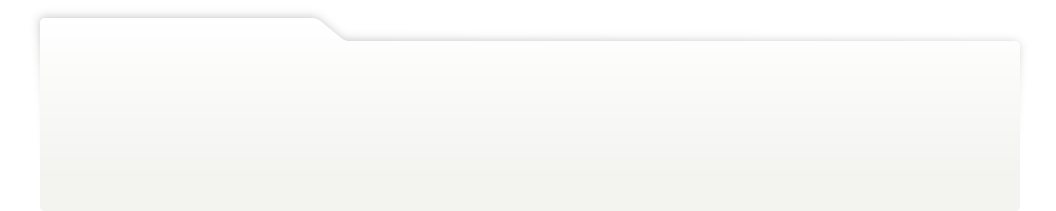
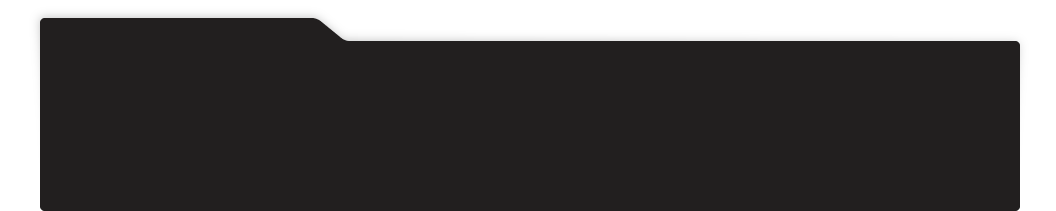
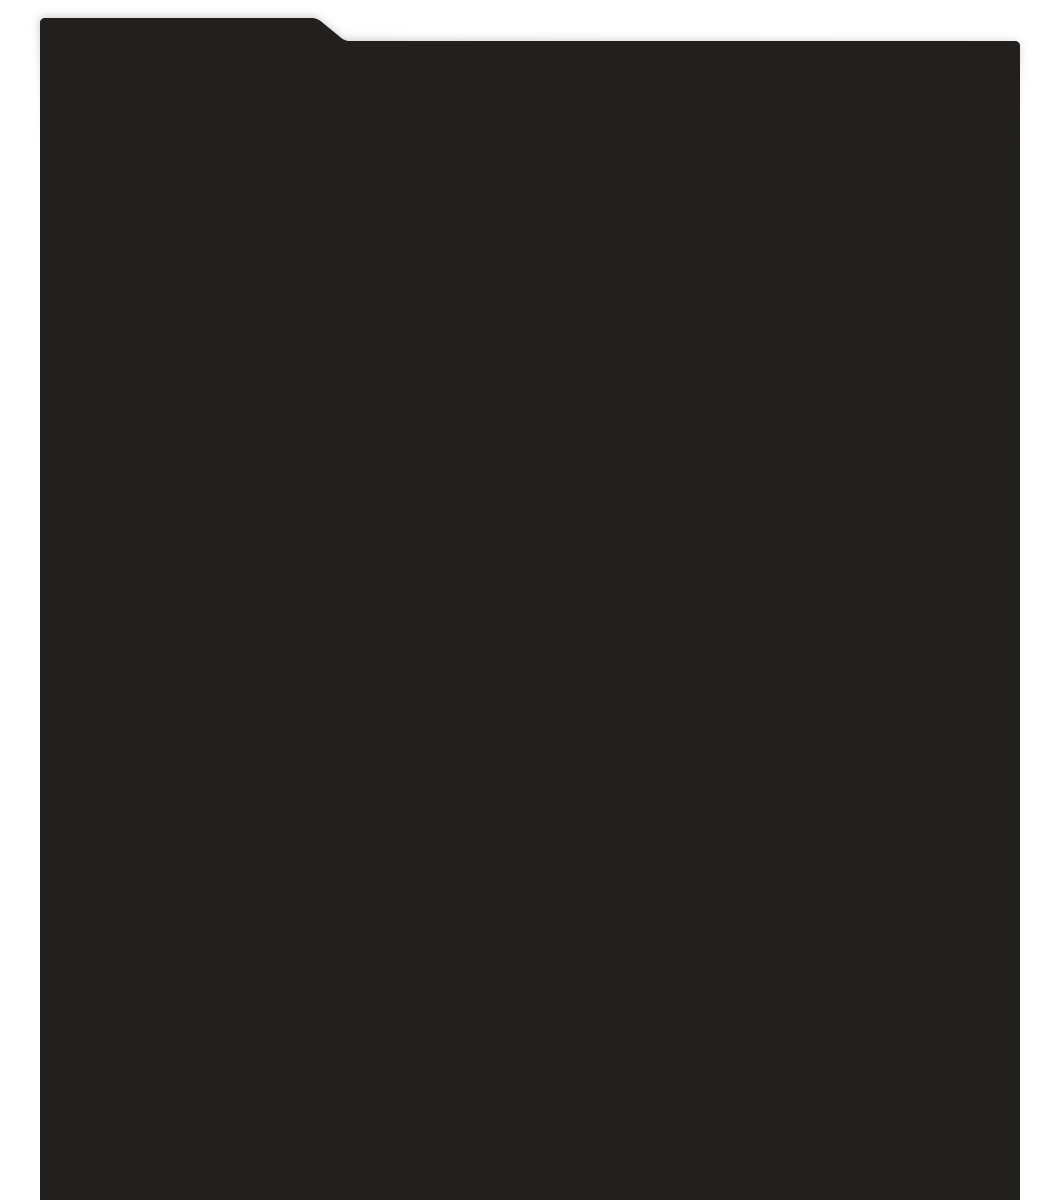
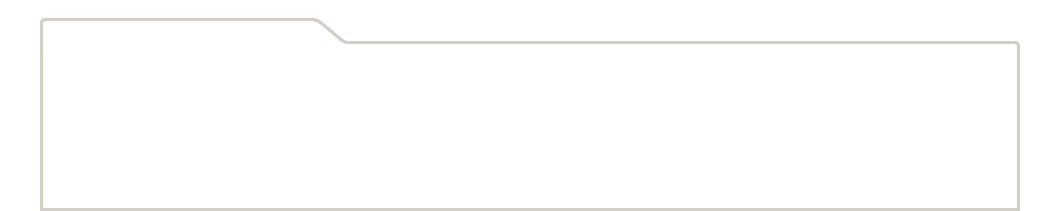
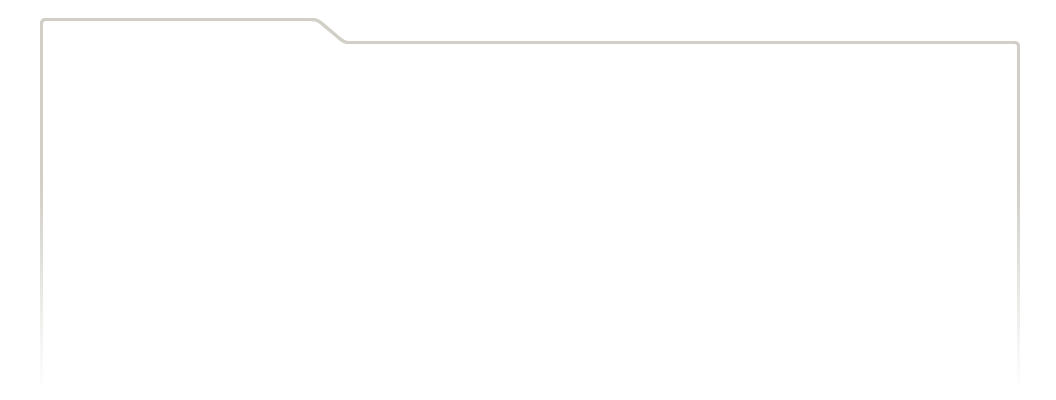
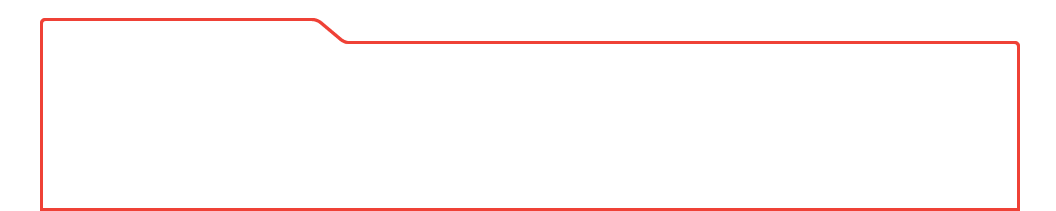
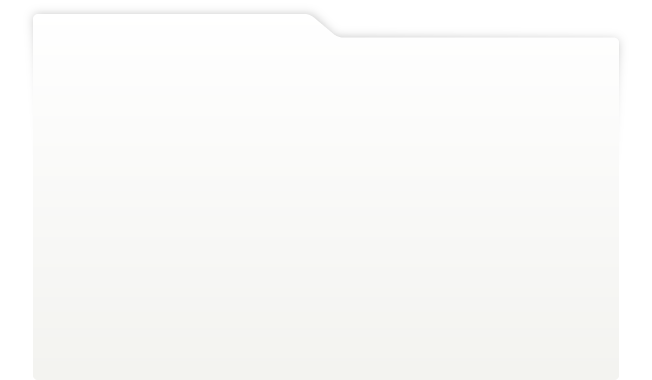
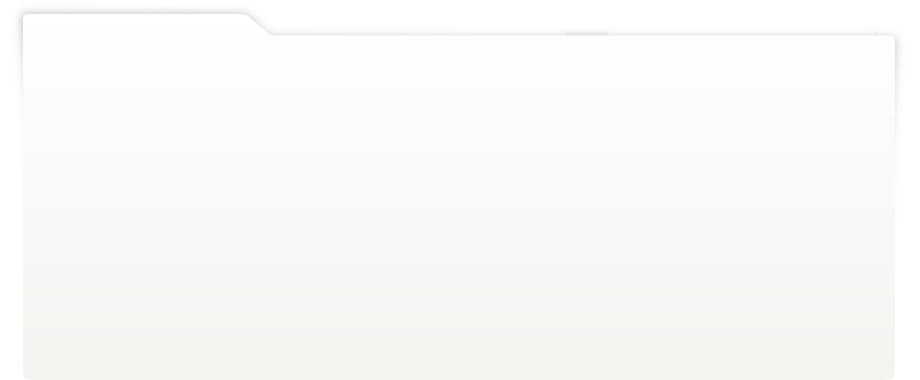
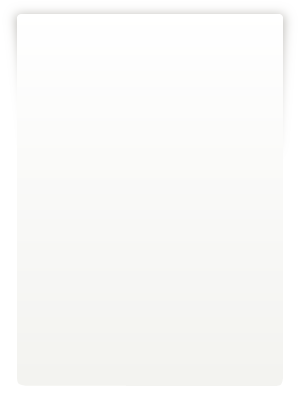
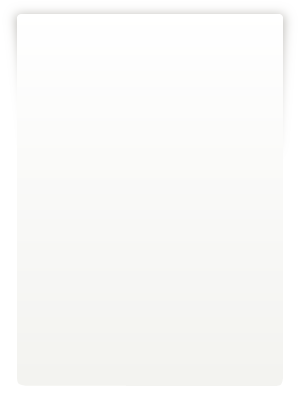
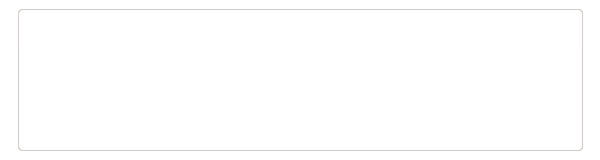
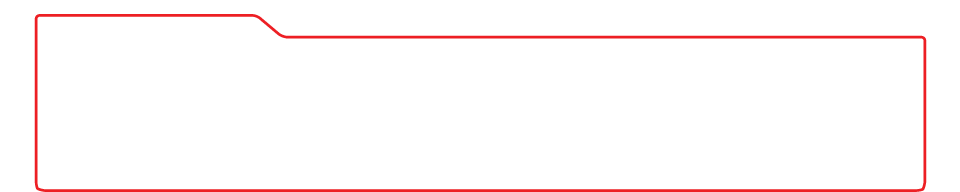
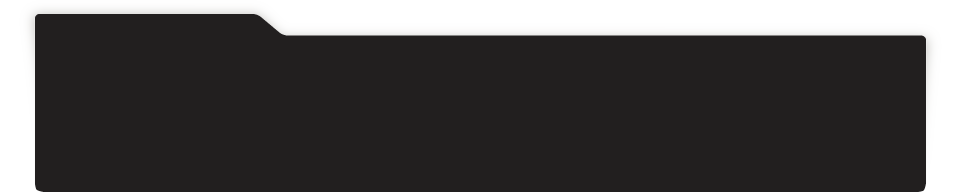
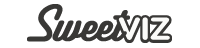
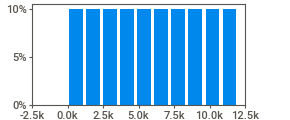
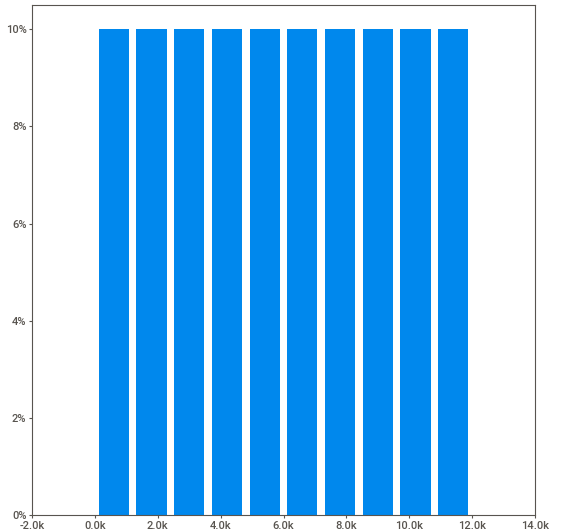
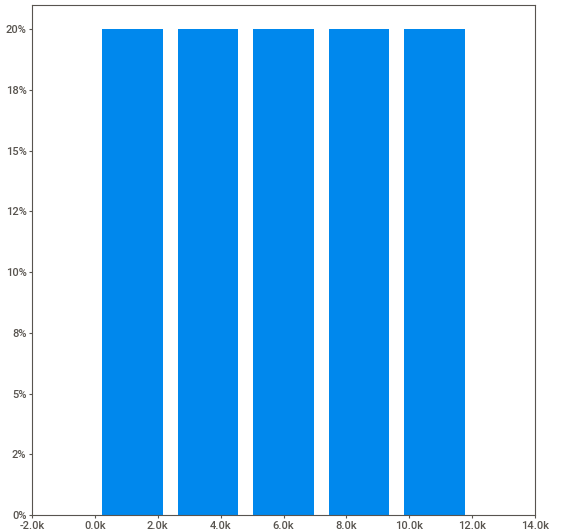
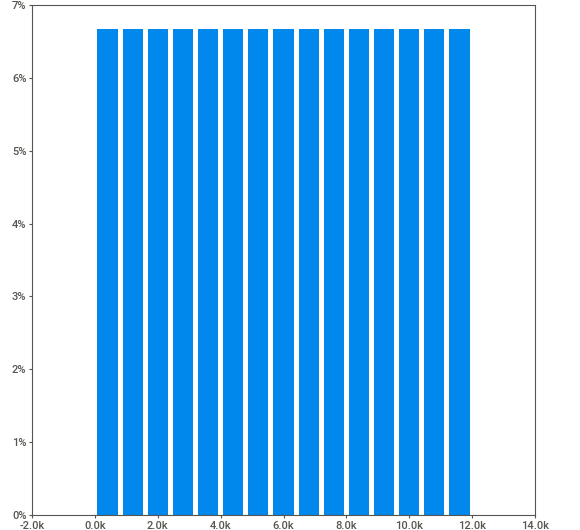
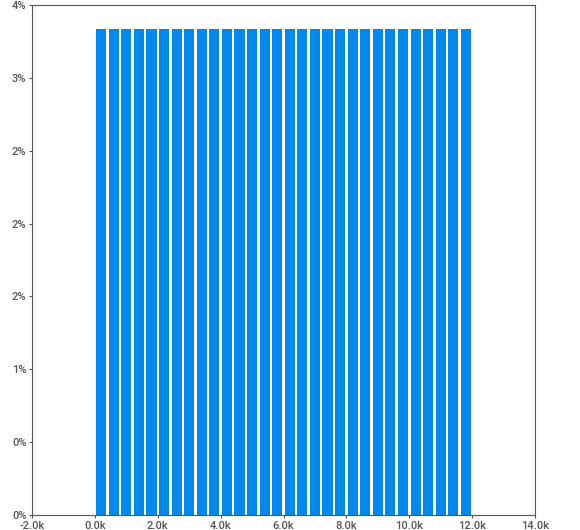
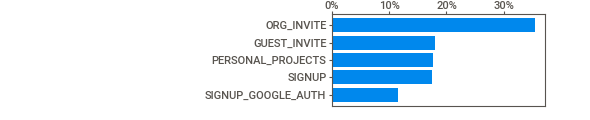
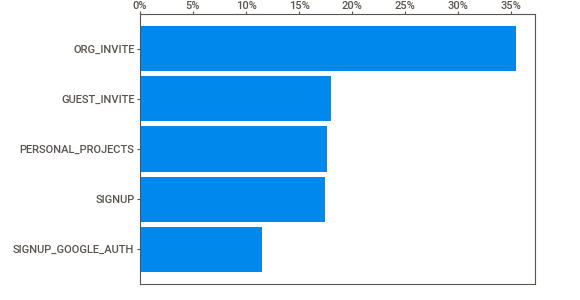
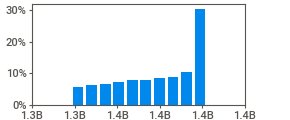
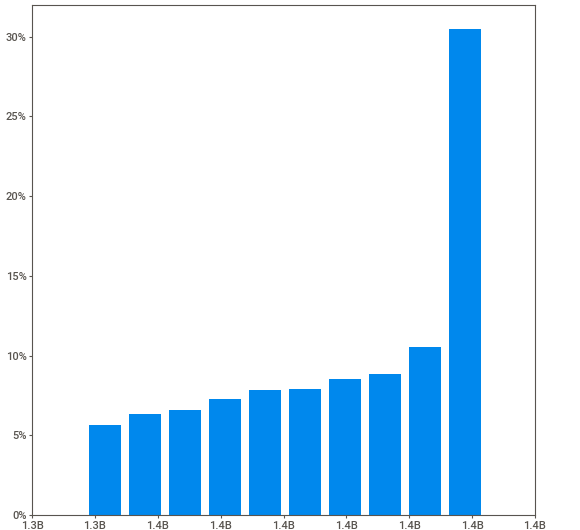
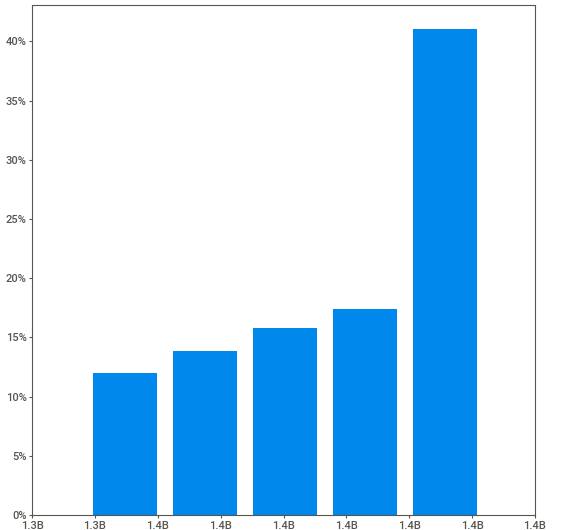
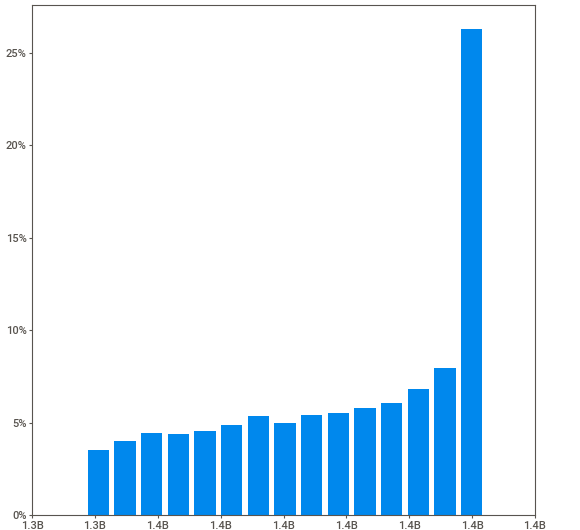
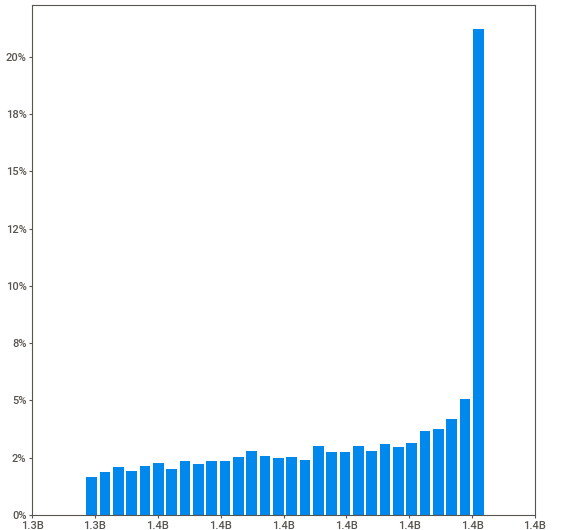
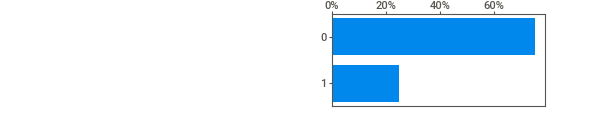
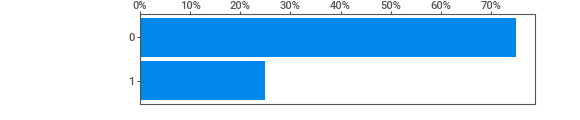
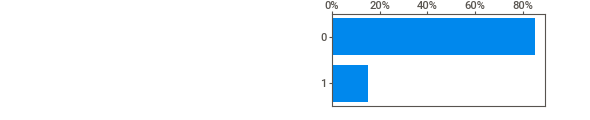
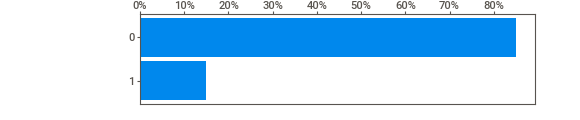
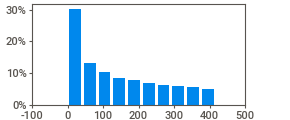
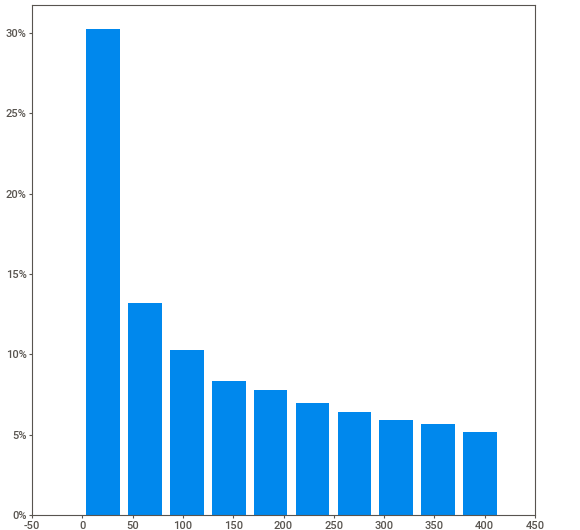
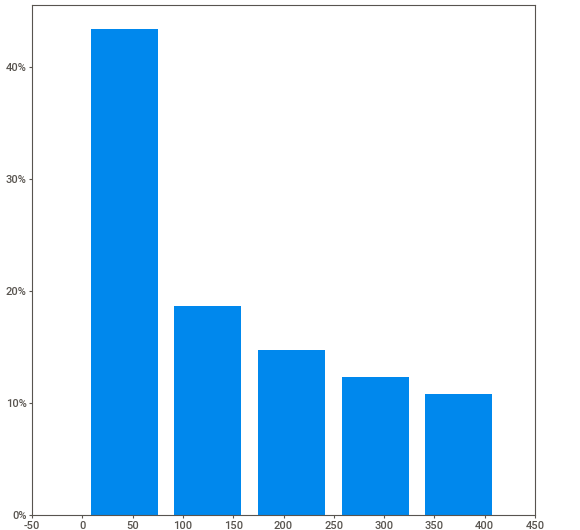
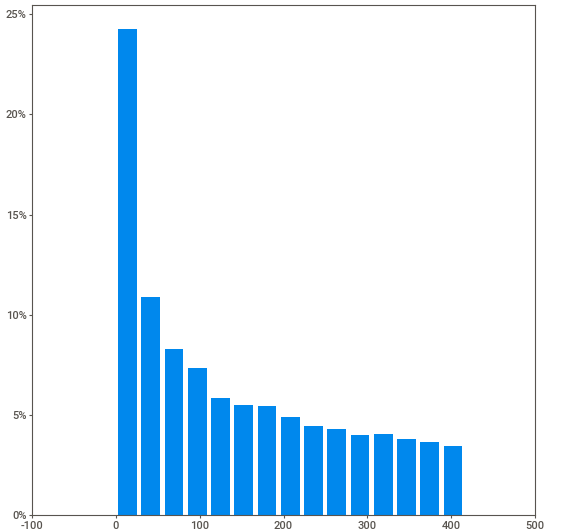
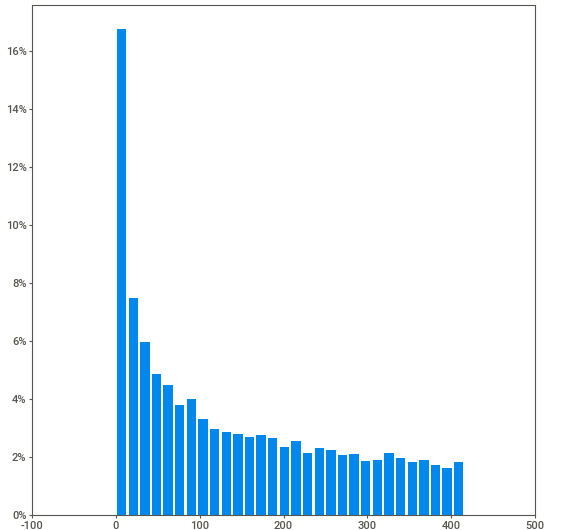
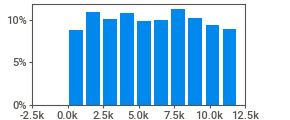
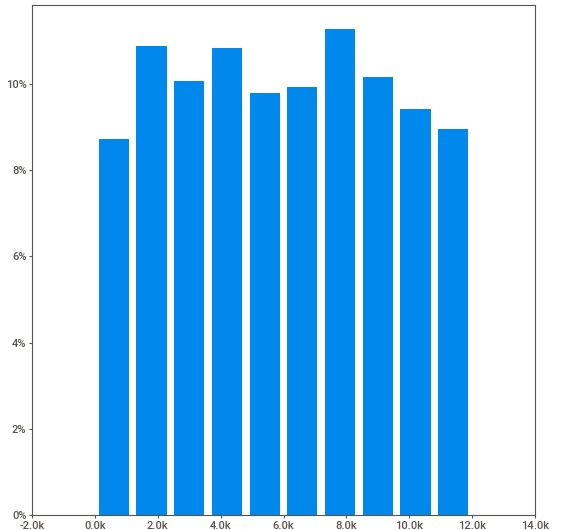
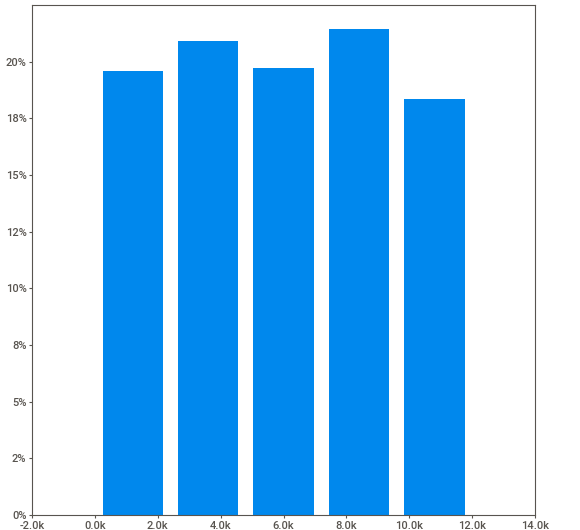
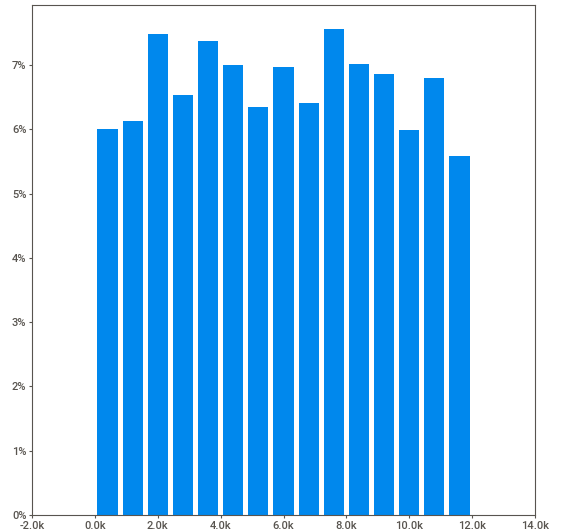
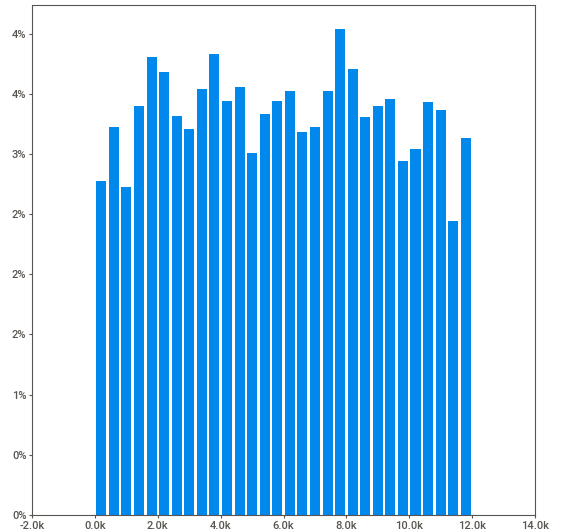
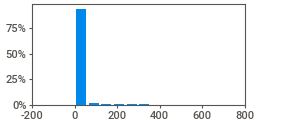
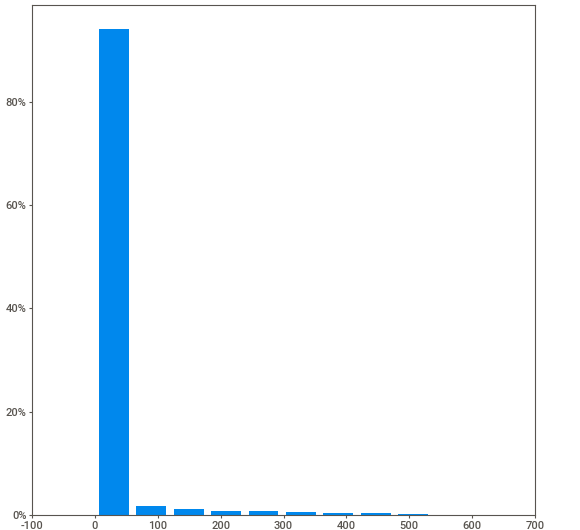
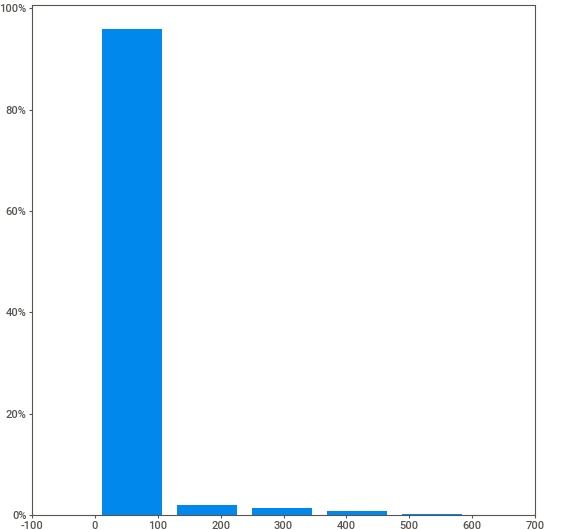
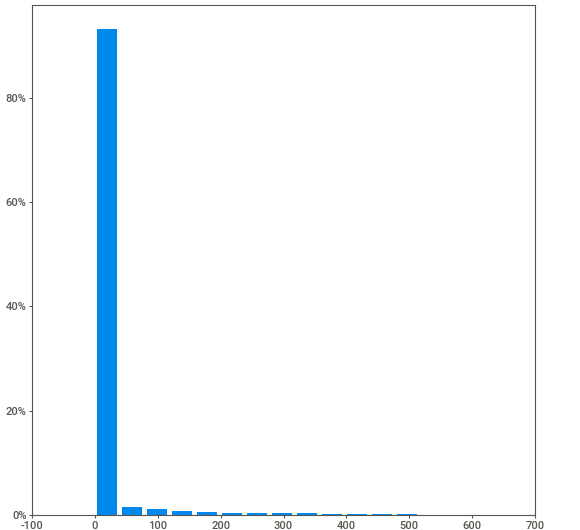
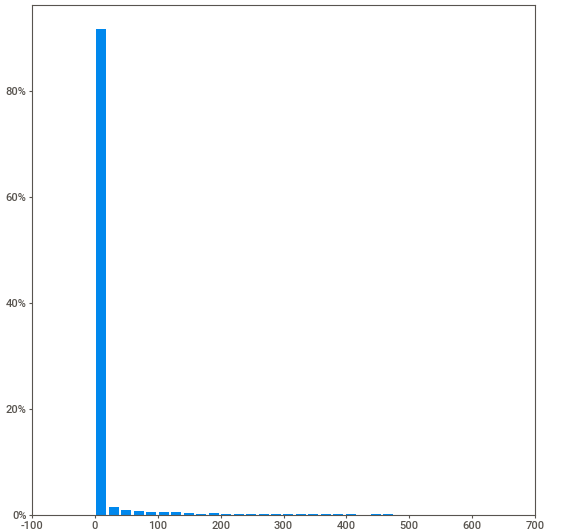
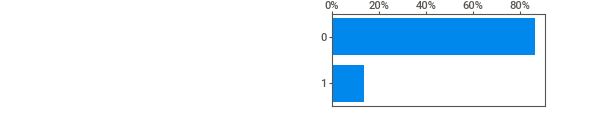
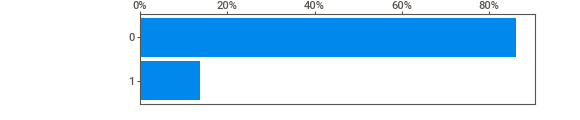
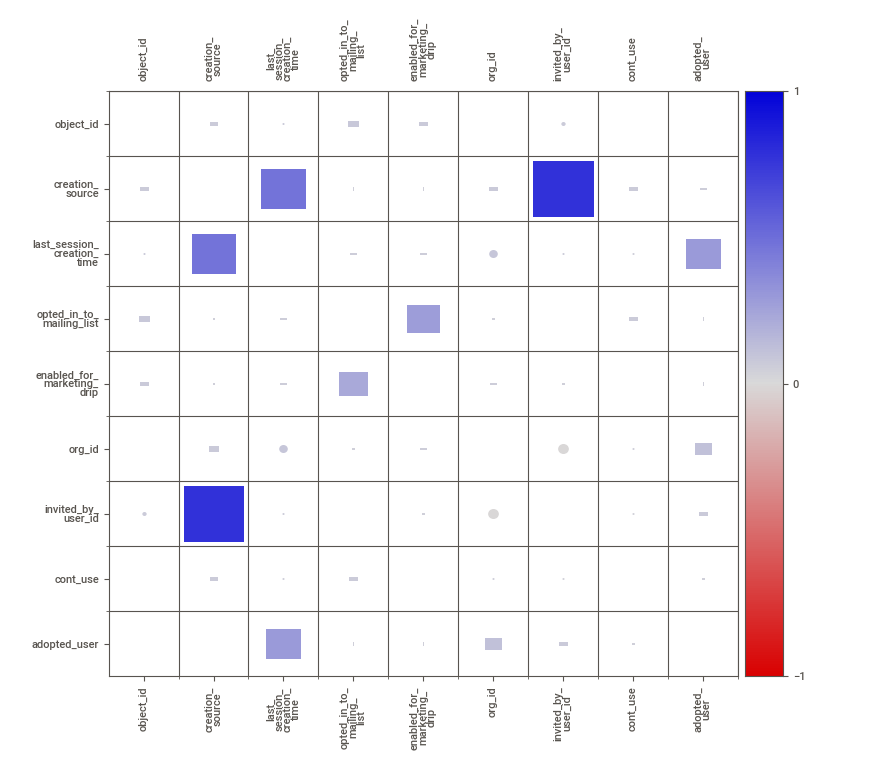
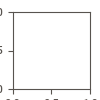

In [25]:
report = sv.analyze(users)
report.show_notebook(  w=None, 
                h=None, 
                scale=None,
                layout='widescreen',
                filepath=None)

In [26]:
users[users['last_session_creation_time'].isna()]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,cont_use,adopted_user
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0,0
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaN,0,0,130,9270.0,0,0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,175,NaN,0,0
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,211,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11975,11976,2013-12-25 22:01:41,Kohl Leah,LeahKohl@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,248,NaN,197,0
11977,11978,2014-04-23 16:28:06,Castro Pedro,PedroCunhaCastro@gustr.com,PERSONAL_PROJECTS,NaN,1,0,29,NaN,0,0
11984,11985,2013-07-08 17:23:26,Jespersen Marcus,MarcusTJespersen@cuvox.de,PERSONAL_PROJECTS,NaN,0,0,74,NaN,0,0
11992,11993,2013-03-28 23:24:21,Townsend Isabel,IsabelTownsend@cuvox.de,PERSONAL_PROJECTS,NaN,0,0,281,NaN,0,0


In [27]:
users = pd.get_dummies(users, columns = ['creation_source'])

In [28]:
users = users.drop(columns = 'last_session_creation_time')

In [29]:
users['invited_by_user_id'] = users['invited_by_user_id'].fillna(0)

In [30]:
users.head(10)

,object_id,creation_time,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,cont_use,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1,0,11,10803.0,0,0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,0,0,1,316.0,0,1,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,0,0,94,1525.0,3,0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,0,1,5151.0,0,0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,0,193,5240.0,0,0,1,0,0,0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,0,0,197,11241.0,0,0,1,0,0,0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,0,1,37,0.0,0,0,0,0,0,1,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,1,1,74,0.0,0,0,0,0,1,0,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,0,0,302,0.0,0,0,0,0,1,0,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1,1,318,4143.0,0,1,0,1,0,0,0


In [31]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'cont_use', 'adopted_user',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

In [32]:
invited = []
for i in range(y):
    if users['invited_by_user_id'][i] == 0:
        invited.append(0)
    if users['invited_by_user_id'][i] != 0:
        invited.append(1)

In [33]:
users['invited_by_user_id'] = invited

In [34]:
users.head()

,object_id,creation_time,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,cont_use,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1,0,11,1,0,0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,0,0,1,1,0,1,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,0,0,94,1,3,0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,0,1,1,0,0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,0,193,1,0,0,1,0,0,0,0


In [35]:
users['adopted_user'].sum()

1656

In [36]:
len(users)

12000

In [37]:
X_train, X_test, y_train, y_test = train_test_split(users.drop(columns=['name', 'email', 'org_id', 'adopted_user', 'creation_time', 'object_id', 'cont_use']), 
                                                    users.adopted_user, test_size=0.25, stratify = users.adopted_user,
                                                    random_state=1701)

In [38]:
random_grid = {
 'max_depth': [3, 5, 7, 10, None],
 'min_samples_leaf': [5, 10, 50, 100],
 'n_estimators': [100],
 'random_state': [1701]}

In [39]:
rf = RandomForestClassifier(random_state = 1701)

In [40]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, random_state=1701)

In [41]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [100],
                                        'random_state': [1701]},
                   random_state=1701)

In [42]:
rf_random.best_params_

{'random_state': 1701,
 'n_estimators': 100,
 'min_samples_leaf': 5,
 'max_depth': 3}

In [43]:
rf_fin = RandomForestClassifier(random_state = 1701, n_estimators = 100, min_samples_leaf = 5, max_depth = 3)

In [44]:
rf_fin.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, random_state=1701)

In [45]:
print("score on test: " + str(rf_fin.score(X_test, y_test)))
print("score on train: "+ str(rf_fin.score(X_train, y_train)))


score on test: 0.862
score on train: 0.862


In [46]:
importances = rf_fin.feature_importances_

In [47]:
rf_importances = pd.Series(importances, index = X_test.columns)
rf_importances = rf_importances.sort_values(ascending = False)

In [48]:
rf_importances.head(14)

creation_source_PERSONAL_PROJECTS     0.382417
creation_source_GUEST_INVITE          0.226257
creation_source_SIGNUP_GOOGLE_AUTH    0.113440
creation_source_ORG_INVITE            0.070116
invited_by_user_id                    0.062355
opted_in_to_mailing_list              0.061634
enabled_for_marketing_drip            0.059670
creation_source_SIGNUP                0.024112
dtype: float64

                                             |          | [  0%]   00:00 -> (? left)


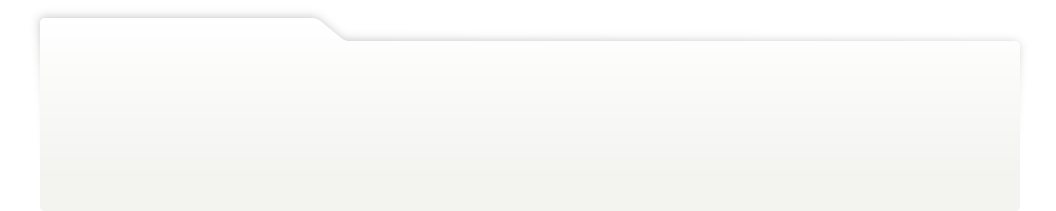
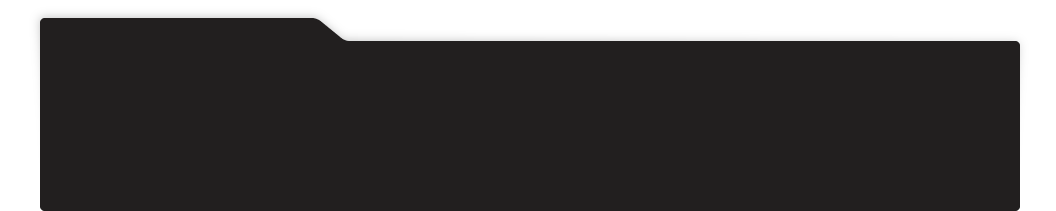
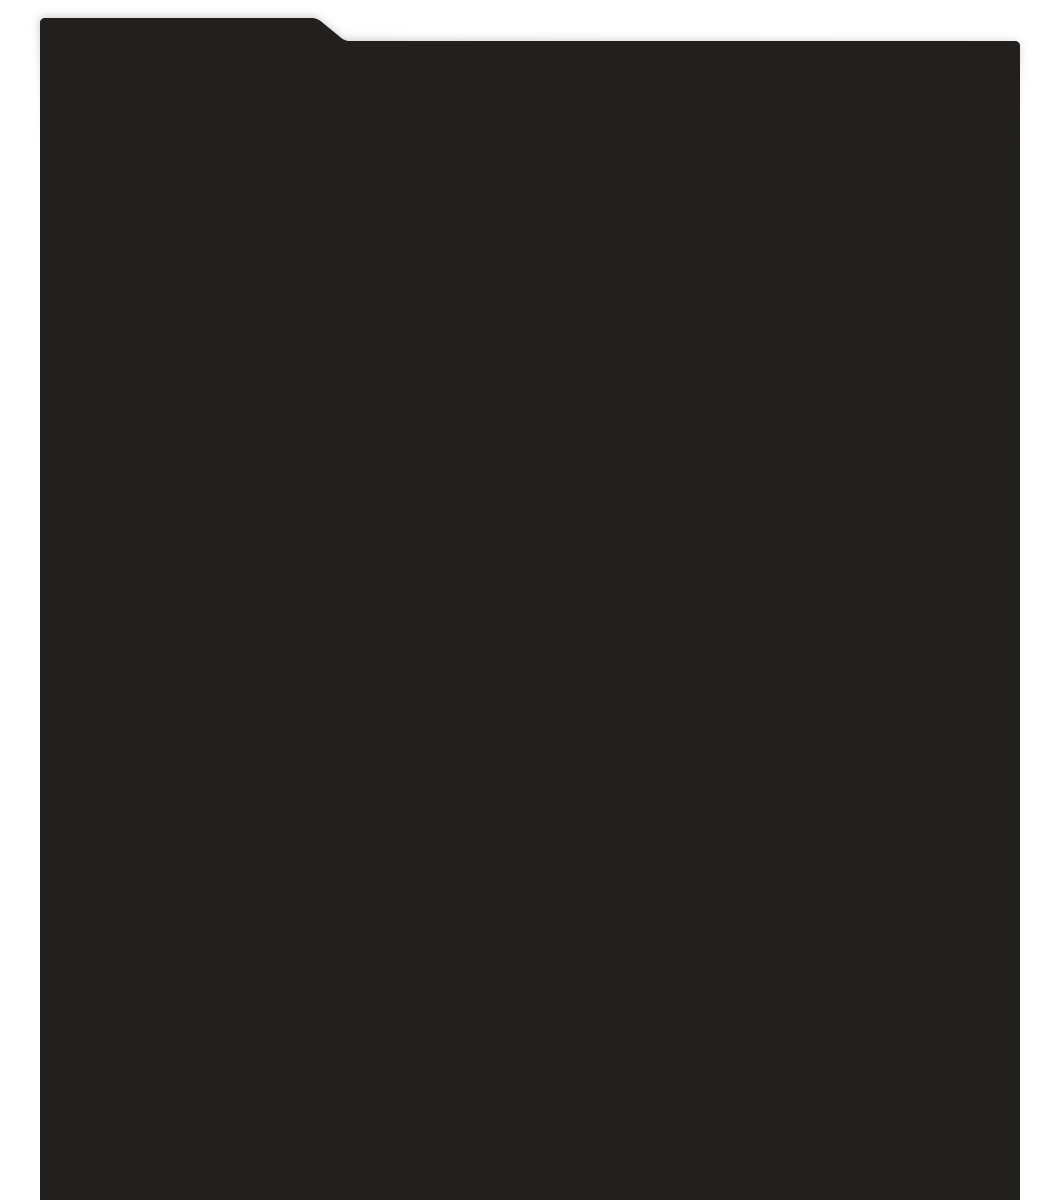
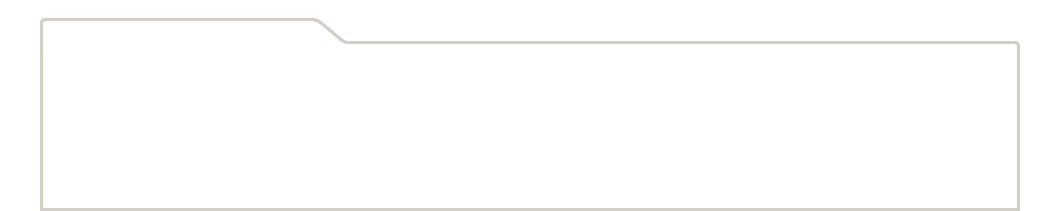
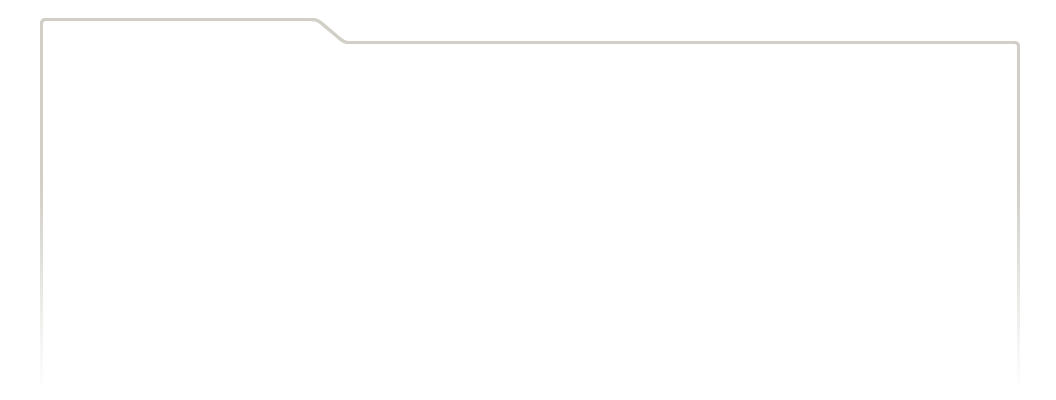
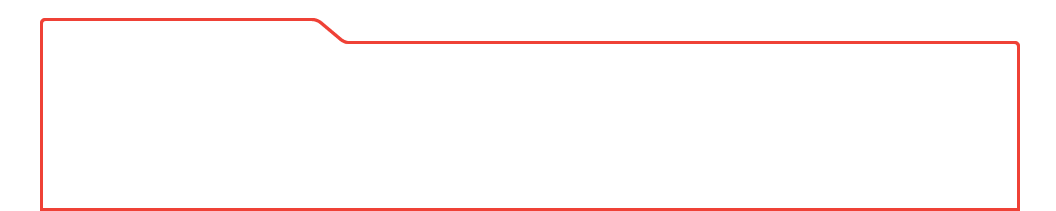
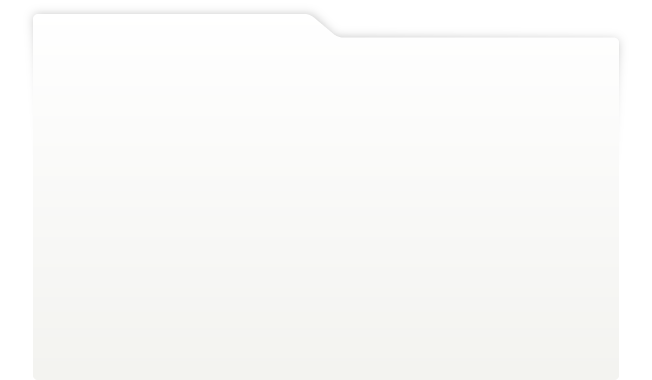
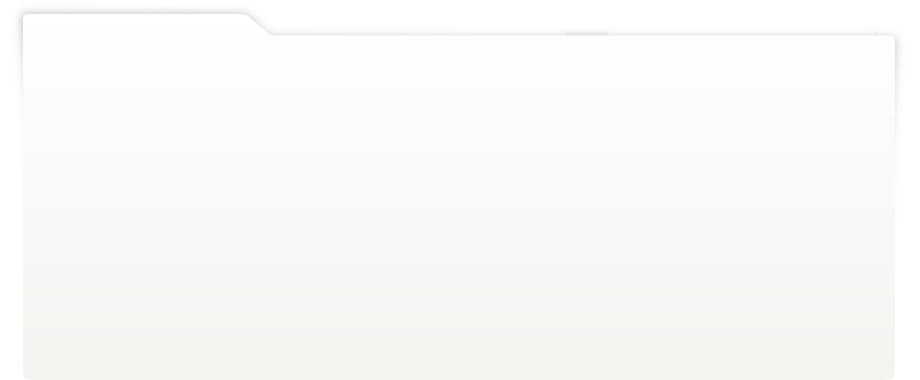
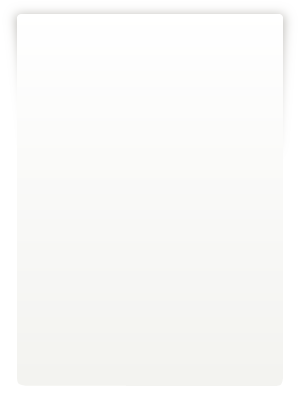
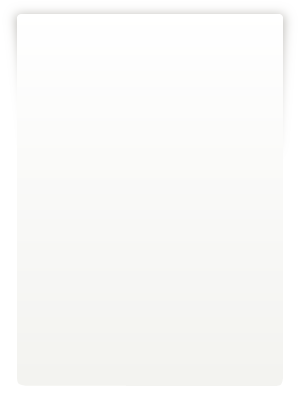
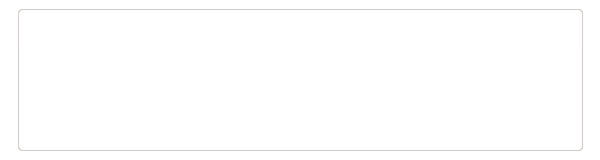
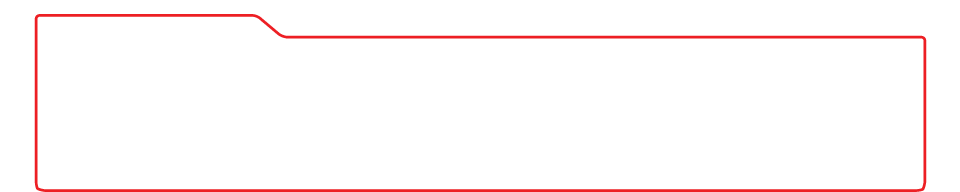
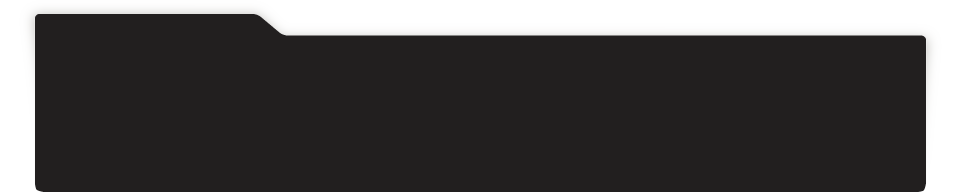
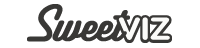
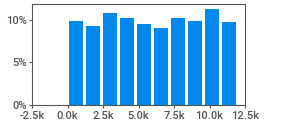
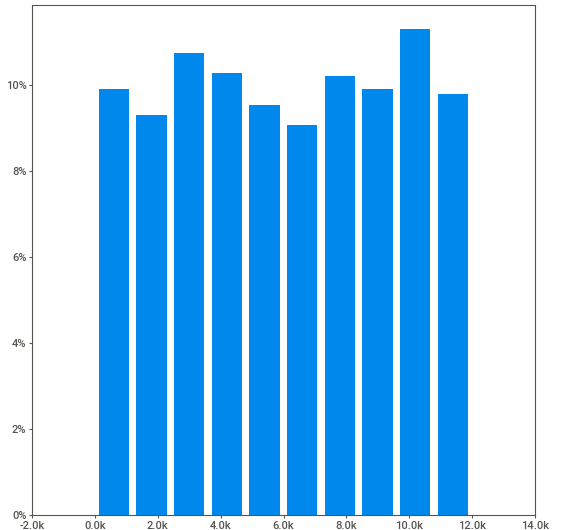
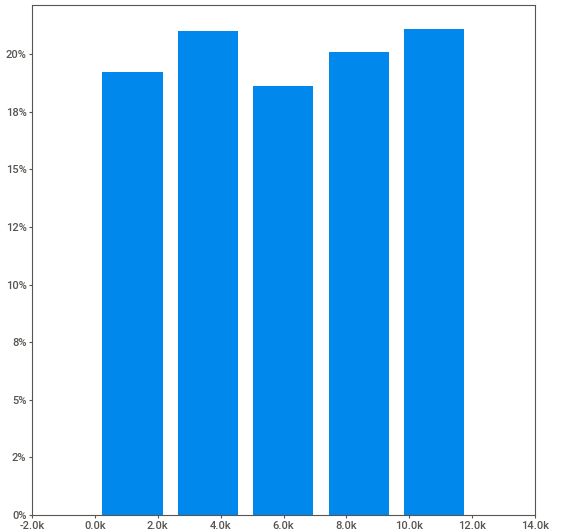
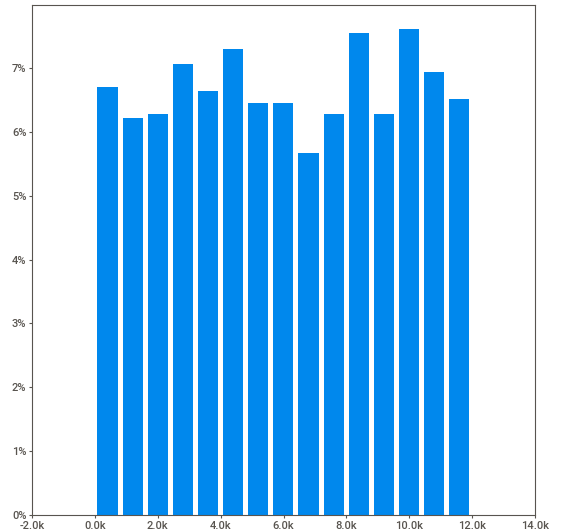
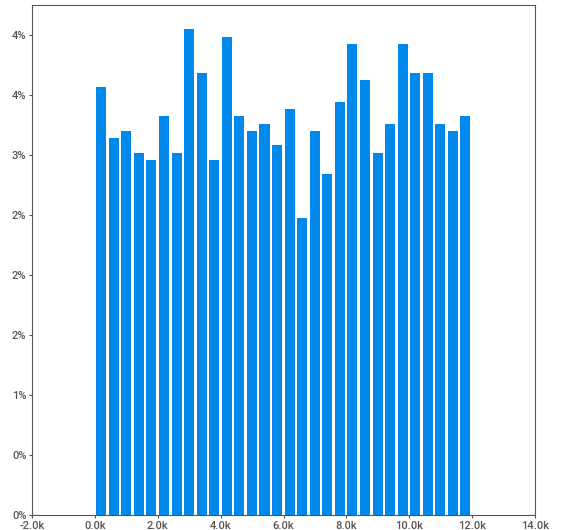
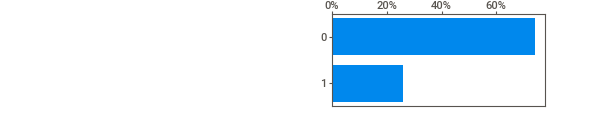
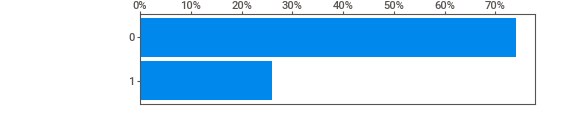
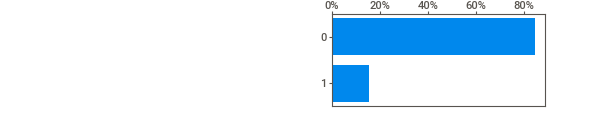
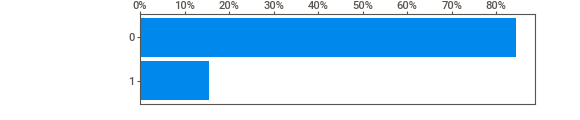
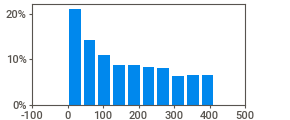
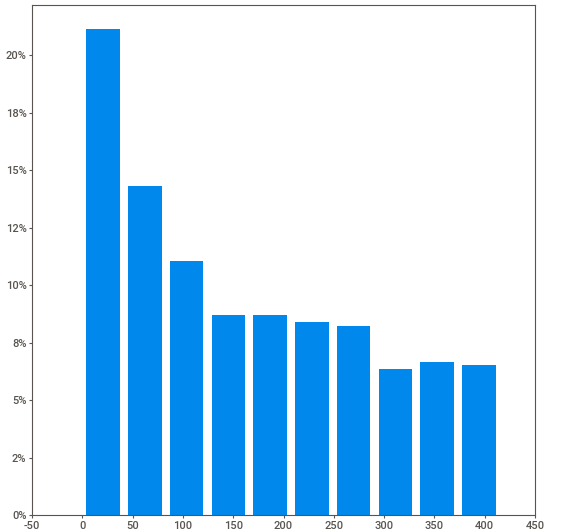
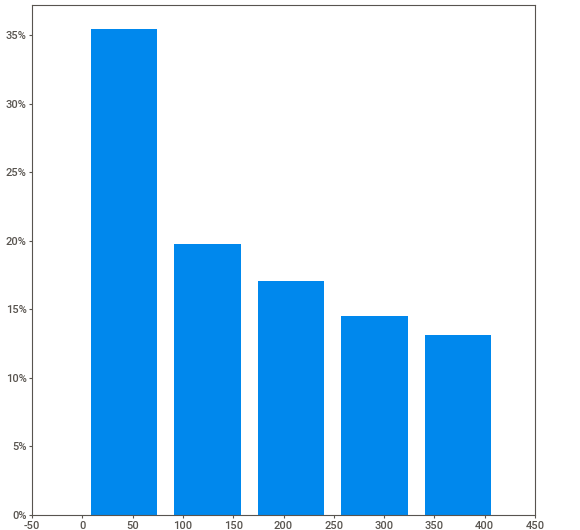
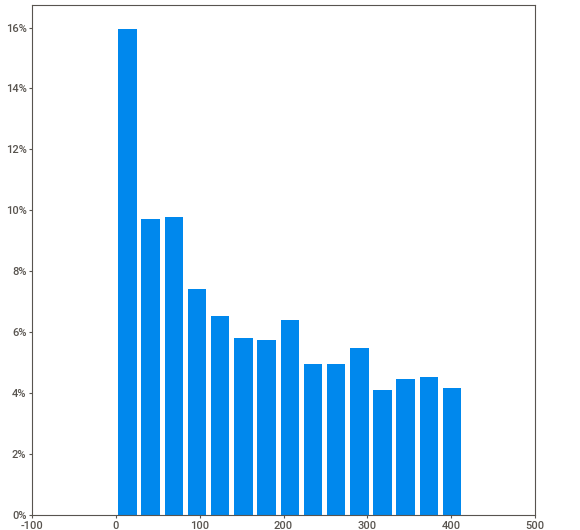
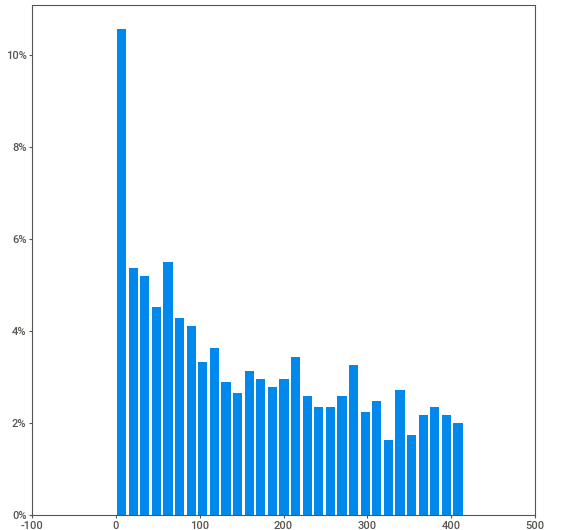
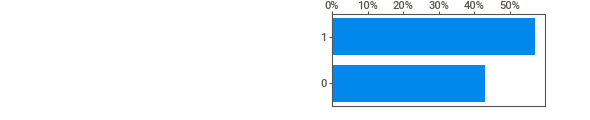
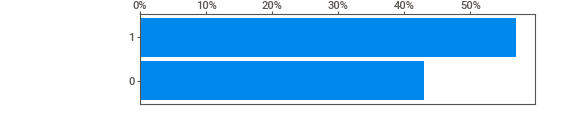
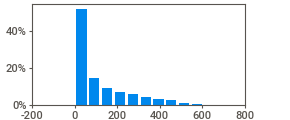
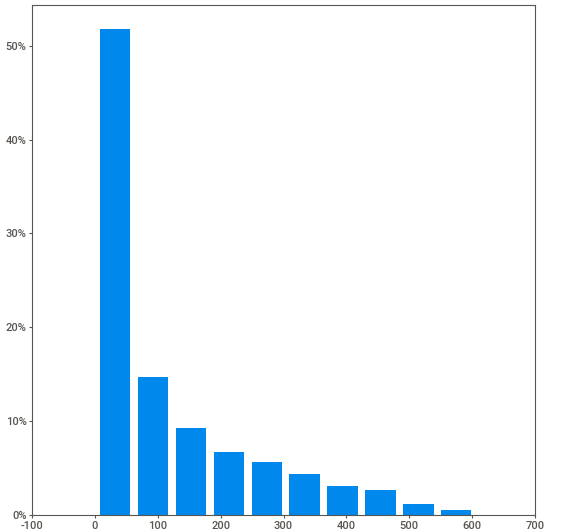
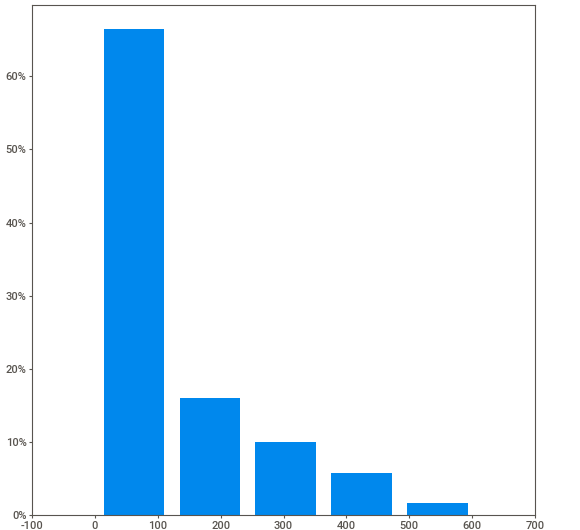
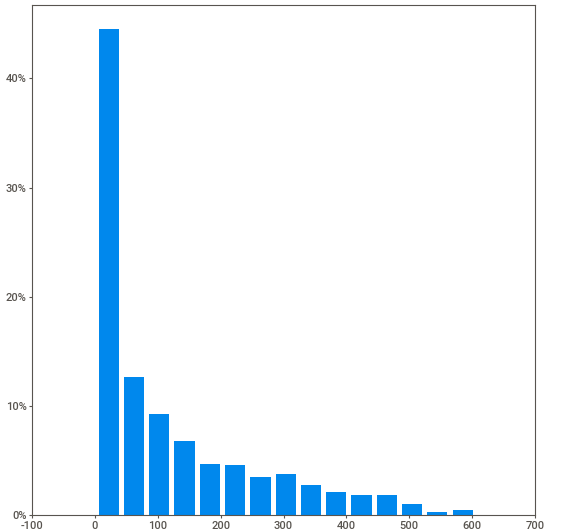
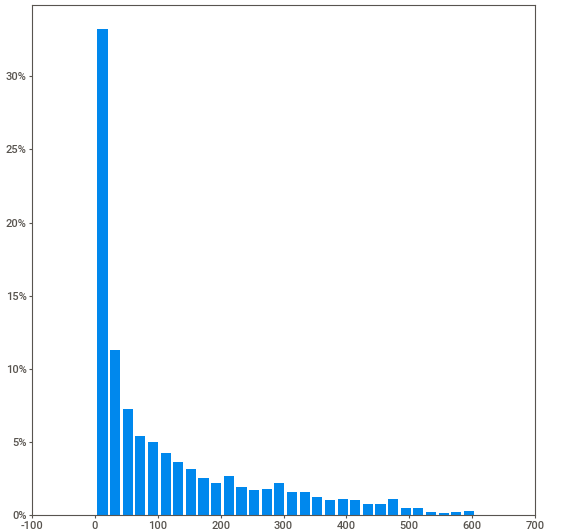
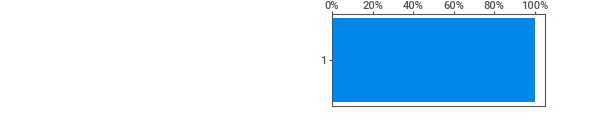
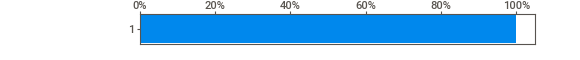
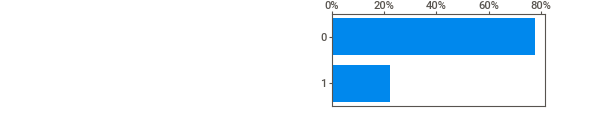
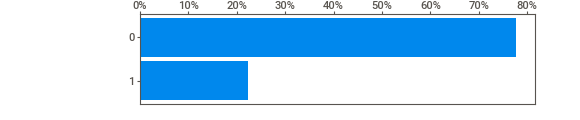
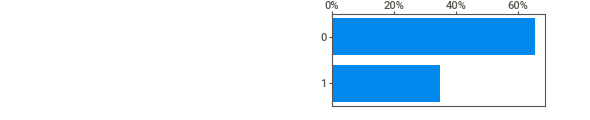
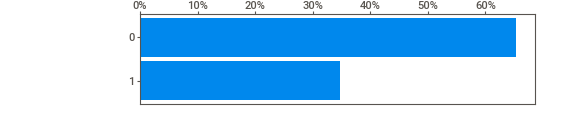
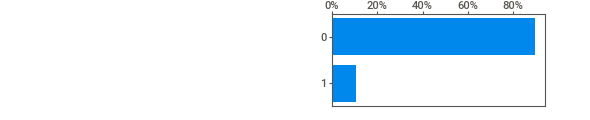
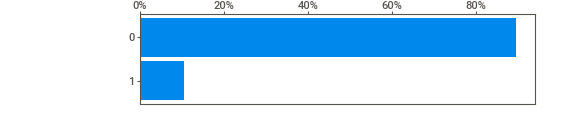
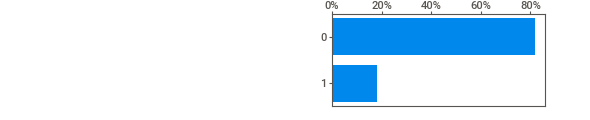
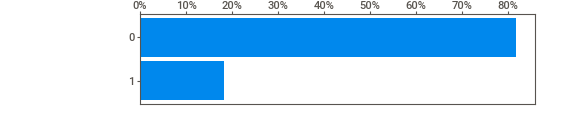
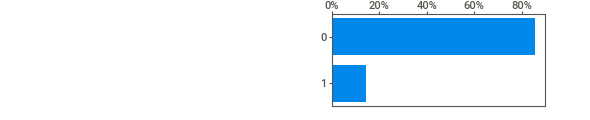
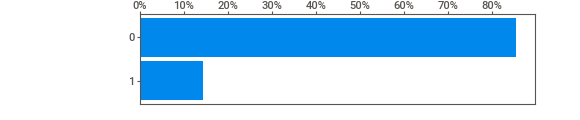
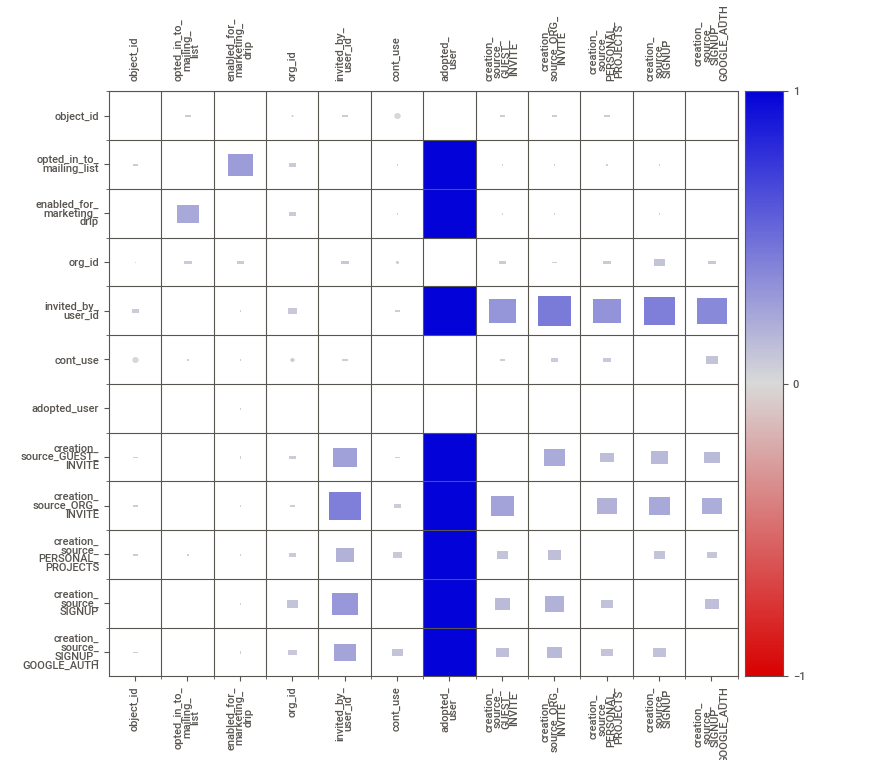
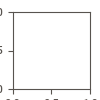

In [210]:
report = sv.analyze(users)
report.show_notebook(  w=None, 
                h=None, 
                scale=None,
                layout='widescreen',
                filepath=None)

In [50]:
pp = users[users['creation_source_PERSONAL_PROJECTS'] ==1]

In [51]:
pp['adopted_user'].sum()

172

In [52]:
len(pp)

2111

In [53]:
172/2111

0.08147797252486973

In [54]:
len(users)

12000

In [55]:
1656/12000

0.138

In [56]:
gi = users[users['creation_source_GUEST_INVITE'] ==1] 

In [57]:
gi['adopted_user'].sum()

369

In [58]:
len(gi)

2163

In [59]:
369/2163

0.17059639389736478

In [60]:
sga = users[users['creation_source_SIGNUP_GOOGLE_AUTH'] ==1] 

In [61]:
sga['adopted_user'].sum()

239

In [62]:
len(sga)

1385

In [63]:
239/1385

0.17256317689530687

In [64]:
oi = users[users['creation_source_ORG_INVITE'] ==1] 

In [65]:
oi['adopted_user'].sum()

574

In [66]:
len(oi)

4254

In [67]:
574/4254

0.13493182886694877

In [211]:
1656/12000

0.138

In [213]:
su = users[users['creation_source_SIGNUP'] ==1] 

In [214]:
len(su)

302

In [215]:
su['adopted_user'].sum()

302

In [216]:
su.head()

,object_id,creation_time,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,cont_use,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
2,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,0,0,58,0,6,1,0,0,0,1,0
4,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,1,0,235,0,339,1,0,0,0,1,0
15,87,2013-09-11 22:53:29,Martins Isabela,IsabelaAzevedoMartins@jourrapide.com,1,0,26,0,98,1,0,0,0,1,0
16,133,2013-09-12 12:39:43,Melo Matilde,MatildeFernandesMelo@gmail.com,0,0,249,0,67,1,0,0,0,1,0
20,153,2013-04-28 00:00:14,Boone Timothy,TimothyMBoone@gustr.com,0,0,64,0,155,1,0,0,0,1,0


In [217]:
su.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,cont_use,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
count,302.000000,302.000000,302.000000,302.00000,302.0,302.000000,302.0,302.0,302.0,302.0,302.0,302.0
mean,6091.367550,0.264901,0.158940,176.10596,0.0,113.546358,1.0,0.0,0.0,0.0,1.0,0.0
std,3588.133913,0.442013,0.366227,125.27170,0.0,125.740265,0.0,0.0,0.0,0.0,0.0,0.0
min,20.000000,0.000000,0.000000,0.00000,0.0,2.000000,1.0,0.0,0.0,0.0,1.0,0.0
25%,2901.000000,0.000000,0.000000,59.75000,0.0,15.000000,1.0,0.0,0.0,0.0,1.0,0.0
50%,6106.000000,0.000000,0.000000,165.00000,0.0,60.000000,1.0,0.0,0.0,0.0,1.0,0.0
75%,9457.000000,1.000000,0.000000,287.00000,0.0,172.250000,1.0,0.0,0.0,0.0,1.0,0.0
max,11964.000000,1.000000,1.000000,415.00000,0.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0


In [218]:
302/1656

0.1823671497584541

In [219]:
172/302

0.5695364238410596